In [1]:
# imports:)
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet # For more accurate lemmatization

import matplotlib.pyplot as plt
from collections import Counter

In [3]:
# Downloading necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aayus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\aayus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aayus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aayus\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [22]:
# loading the dataset!
df = pd.read_csv('riwaj.csv')
# Display the first few rows of the DataFrame
print(df.head())


                                                 URL  \
0                     https://thehimalayantimes.com/   
1                 https://thehimalayantimes.com/home   
2                     https://thehimalayantimes.com/   
3                 https://thehimalayantimes.com/home   
4  https://thehimalayantimes.com/nepal/over-400-c...   

                                               Title              Authors  \
0  The Himalayan Times - Nepal's No.1 English Dai...  The Himalayan Times   
1  The Himalayan Times - Nepal's No.1 English Dai...  The Himalayan Times   
2  The Himalayan Times - Nepal's No.1 English Dai...  The Himalayan Times   
3  The Himalayan Times - Nepal's No.1 English Dai...  The Himalayan Times   
4  Over 400 climbers secure permits for Everest a...           Tht Online   

          Publish Date                                            Content  \
0                  NaN  stay tuned with our latest news What happened ...   
1                  NaN  stay tuned with our la

In [24]:
# 1. initial cleaning of text
# function for initial cleaning of text
def clean_text_initial(text):
    # 1. Lowercasing
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove URLs (http, https, www)
    text = re.sub(r'http\S+|www\.\S+', '', text)

    text = text.lower()

    # 2. Remove Punctuation (keep only alphanumeric characters and whitespace)
    text = re.sub(r'[^\w\s]', '', text)

    # 3. Remove Numbers (digits)
    text = re.sub(r'\d+', '', text)

    # 4. Normalize Whitespace (replace multiple spaces with a single space and strip leading/trailing)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# apply the function to the 'joke' column
df['cleaned'] = df['Content'].apply(clean_text_initial)

for i in range(6):
    print(f"Original:   {df['Content'].iloc[i]}")
    print(f"Cleaned:    {df['cleaned'].iloc[i]}\n")

Original:   stay tuned with our latest news What happened today? We make the long story in this snappy news roundup.
Cleaned:    stay tuned with our latest news what happened today we make the long story in this snappy news roundup

Original:   stay tuned with our latest news What happened today? We make the long story in this snappy news roundup.
Cleaned:    stay tuned with our latest news what happened today we make the long story in this snappy news roundup

Original:   stay tuned with our latest news What happened today? We make the long story in this snappy news roundup.
Cleaned:    stay tuned with our latest news what happened today we make the long story in this snappy news roundup

Original:   stay tuned with our latest news What happened today? We make the long story in this snappy news roundup.
Cleaned:    stay tuned with our latest news what happened today we make the long story in this snappy news roundup

Original:   KATHMANDU, APRIL 28 A total of 402 climbers from 53 coun

In [25]:
# 2. tokenization
# tokenizing the cleaned jokes using NLTK's word_tokenize
df['tokenized_text'] = df['cleaned'].apply(word_tokenize)

for i in range(6):
    print(f"Cleaned:    {df['cleaned'].iloc[i]}")
    print(f"Tokenized:  {df['tokenized_text'].iloc[i]}\n")

Cleaned:    stay tuned with our latest news what happened today we make the long story in this snappy news roundup
Tokenized:  ['stay', 'tuned', 'with', 'our', 'latest', 'news', 'what', 'happened', 'today', 'we', 'make', 'the', 'long', 'story', 'in', 'this', 'snappy', 'news', 'roundup']

Cleaned:    stay tuned with our latest news what happened today we make the long story in this snappy news roundup
Tokenized:  ['stay', 'tuned', 'with', 'our', 'latest', 'news', 'what', 'happened', 'today', 'we', 'make', 'the', 'long', 'story', 'in', 'this', 'snappy', 'news', 'roundup']

Cleaned:    stay tuned with our latest news what happened today we make the long story in this snappy news roundup
Tokenized:  ['stay', 'tuned', 'with', 'our', 'latest', 'news', 'what', 'happened', 'today', 'we', 'make', 'the', 'long', 'story', 'in', 'this', 'snappy', 'news', 'roundup']

Cleaned:    stay tuned with our latest news what happened today we make the long story in this snappy news roundup
Tokenized:  ['stay

In [26]:
# 3. removing stop words from the tokenized jokes

# get stopwrords from NLTK
stop_words = set(stopwords.words('english'))

# function to reomve stop words
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# apply the function to the 'tokenized_joke' column
df['stopwords_removed'] = df['tokenized_text'].apply(remove_stopwords)

for i in range(6):
    print(f"Tokenized:  {df['tokenized_text'].iloc[i]}")
    print(f"Stopwords Removed: {df['stopwords_removed'].iloc[i]}\n")

Tokenized:  ['stay', 'tuned', 'with', 'our', 'latest', 'news', 'what', 'happened', 'today', 'we', 'make', 'the', 'long', 'story', 'in', 'this', 'snappy', 'news', 'roundup']
Stopwords Removed: ['stay', 'tuned', 'latest', 'news', 'happened', 'today', 'make', 'long', 'story', 'snappy', 'news', 'roundup']

Tokenized:  ['stay', 'tuned', 'with', 'our', 'latest', 'news', 'what', 'happened', 'today', 'we', 'make', 'the', 'long', 'story', 'in', 'this', 'snappy', 'news', 'roundup']
Stopwords Removed: ['stay', 'tuned', 'latest', 'news', 'happened', 'today', 'make', 'long', 'story', 'snappy', 'news', 'roundup']

Tokenized:  ['stay', 'tuned', 'with', 'our', 'latest', 'news', 'what', 'happened', 'today', 'we', 'make', 'the', 'long', 'story', 'in', 'this', 'snappy', 'news', 'roundup']
Stopwords Removed: ['stay', 'tuned', 'latest', 'news', 'happened', 'today', 'make', 'long', 'story', 'snappy', 'news', 'roundup']

Tokenized:  ['stay', 'tuned', 'with', 'our', 'latest', 'news', 'what', 'happened', 'toda

In [27]:
# 4. normalization a. Stemming

# stemming function from nltk
porter_stemmer = PorterStemmer()

def apply_stemming(tokens):
    return [porter_stemmer.stem(word) for word in tokens]

df['stemmed_text'] = df['stopwords_removed'].apply(apply_stemming)

for i in range(6):
    print(f"Stopwords Removed: {df['stopwords_removed'].iloc[i]}")
    print(f"Stemmed: {df['stemmed_text'].iloc[i]}\n")

Stopwords Removed: ['stay', 'tuned', 'latest', 'news', 'happened', 'today', 'make', 'long', 'story', 'snappy', 'news', 'roundup']
Stemmed: ['stay', 'tune', 'latest', 'news', 'happen', 'today', 'make', 'long', 'stori', 'snappi', 'news', 'roundup']

Stopwords Removed: ['stay', 'tuned', 'latest', 'news', 'happened', 'today', 'make', 'long', 'story', 'snappy', 'news', 'roundup']
Stemmed: ['stay', 'tune', 'latest', 'news', 'happen', 'today', 'make', 'long', 'stori', 'snappi', 'news', 'roundup']

Stopwords Removed: ['stay', 'tuned', 'latest', 'news', 'happened', 'today', 'make', 'long', 'story', 'snappy', 'news', 'roundup']
Stemmed: ['stay', 'tune', 'latest', 'news', 'happen', 'today', 'make', 'long', 'stori', 'snappi', 'news', 'roundup']

Stopwords Removed: ['stay', 'tuned', 'latest', 'news', 'happened', 'today', 'make', 'long', 'story', 'snappy', 'news', 'roundup']
Stemmed: ['stay', 'tune', 'latest', 'news', 'happen', 'today', 'make', 'long', 'stori', 'snappi', 'news', 'roundup']

Stopword

In [28]:
# 4. normalization b. Lemmatization with POS tagging
# lemmatization function from nltk
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    """Converts treebank tags to wordnet tags."""
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if no match found
    
def apply_lemmatization(tokens):
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]

df['pos_lemmatized_text'] = df['stopwords_removed'].apply(apply_lemmatization)

for i in range(6):
    print(f"Stopwords Removed: {df['stopwords_removed'].iloc[i]}")
    print(f"POS Lemmatized: {df['pos_lemmatized_text'].iloc[i]}\n")    

Stopwords Removed: ['stay', 'tuned', 'latest', 'news', 'happened', 'today', 'make', 'long', 'story', 'snappy', 'news', 'roundup']
POS Lemmatized: ['stay', 'tuned', 'latest', 'news', 'happened', 'today', 'make', 'long', 'story', 'snappy', 'news', 'roundup']

Stopwords Removed: ['stay', 'tuned', 'latest', 'news', 'happened', 'today', 'make', 'long', 'story', 'snappy', 'news', 'roundup']
POS Lemmatized: ['stay', 'tuned', 'latest', 'news', 'happened', 'today', 'make', 'long', 'story', 'snappy', 'news', 'roundup']

Stopwords Removed: ['stay', 'tuned', 'latest', 'news', 'happened', 'today', 'make', 'long', 'story', 'snappy', 'news', 'roundup']
POS Lemmatized: ['stay', 'tuned', 'latest', 'news', 'happened', 'today', 'make', 'long', 'story', 'snappy', 'news', 'roundup']

Stopwords Removed: ['stay', 'tuned', 'latest', 'news', 'happened', 'today', 'make', 'long', 'story', 'snappy', 'news', 'roundup']
POS Lemmatized: ['stay', 'tuned', 'latest', 'news', 'happened', 'today', 'make', 'long', 'story'

In [29]:
# 4. normalization b. Lemmatization without POS tagging
# lemmatization function from nltk
lemmatizer = WordNetLemmatizer()

def apply_lemmatization(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df['lemmatized_text'] = df['stopwords_removed'].apply(apply_lemmatization)

for i in range(6):
    print(f"Stopwords Removed: {df['stopwords_removed'].iloc[i]}")
    print(f"Lemmatized: {df['lemmatized_text'].iloc[i]}\n")    

Stopwords Removed: ['stay', 'tuned', 'latest', 'news', 'happened', 'today', 'make', 'long', 'story', 'snappy', 'news', 'roundup']
Lemmatized: ['stay', 'tuned', 'latest', 'news', 'happened', 'today', 'make', 'long', 'story', 'snappy', 'news', 'roundup']

Stopwords Removed: ['stay', 'tuned', 'latest', 'news', 'happened', 'today', 'make', 'long', 'story', 'snappy', 'news', 'roundup']
Lemmatized: ['stay', 'tuned', 'latest', 'news', 'happened', 'today', 'make', 'long', 'story', 'snappy', 'news', 'roundup']

Stopwords Removed: ['stay', 'tuned', 'latest', 'news', 'happened', 'today', 'make', 'long', 'story', 'snappy', 'news', 'roundup']
Lemmatized: ['stay', 'tuned', 'latest', 'news', 'happened', 'today', 'make', 'long', 'story', 'snappy', 'news', 'roundup']

Stopwords Removed: ['stay', 'tuned', 'latest', 'news', 'happened', 'today', 'make', 'long', 'story', 'snappy', 'news', 'roundup']
Lemmatized: ['stay', 'tuned', 'latest', 'news', 'happened', 'today', 'make', 'long', 'story', 'snappy', 'new

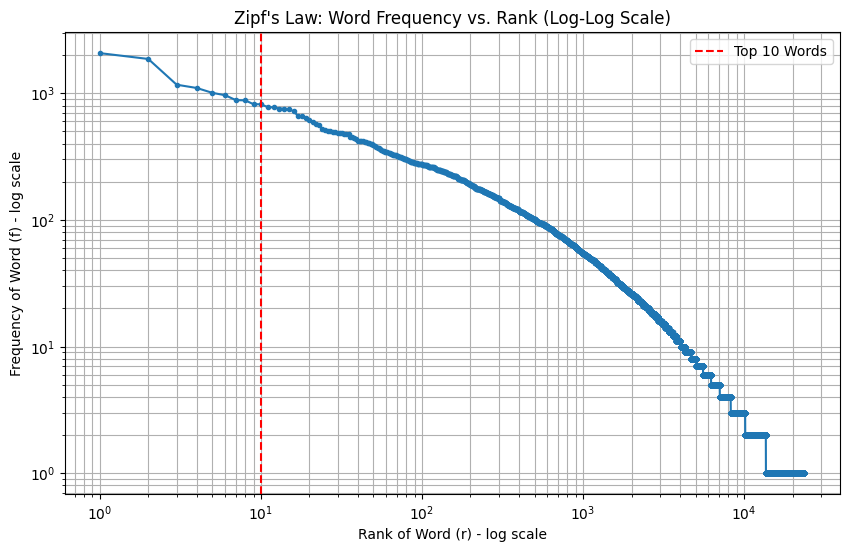


--- Top 10 Most Frequent Lemmatized Words ---
Rank 1: 'said' (Frequency: 2076)
Rank 2: 'nepal' (Frequency: 1867)
Rank 3: 'also' (Frequency: 1169)
Rank 4: 'kathmandu' (Frequency: 1101)
Rank 5: 'minister' (Frequency: 1008)
Rank 6: 'first' (Frequency: 965)
Rank 7: 'year' (Frequency: 883)
Rank 8: 'two' (Frequency: 879)
Rank 9: 'people' (Frequency: 820)
Rank 10: 'one' (Frequency: 819)

--- Zipf's Law: Frequency * Rank for Top 5 ---
Rank 1: 'said' (Freq: 2076) -> Freq * Rank: 2076
Rank 2: 'nepal' (Freq: 1867) -> Freq * Rank: 3734
Rank 3: 'also' (Freq: 1169) -> Freq * Rank: 3507
Rank 4: 'kathmandu' (Freq: 1101) -> Freq * Rank: 4404
Rank 5: 'minister' (Freq: 1008) -> Freq * Rank: 5040


In [32]:
# Zipf's law demo check
all_lemmas = [word for sublist in df['lemmatized_text'] for word in sublist]
# Get word frequencies
word_counts = Counter(all_lemmas)
# Sort words by frequency in descending order
sorted_word_counts = word_counts.most_common()

# Extract frequencies and ranks
frequencies = [count for word, count in sorted_word_counts]
ranks = list(range(1, len(frequencies) + 1))

# Check for empty lists to avoid log(0) errors
if not frequencies:
    print("No words found after preprocessing. Cannot calculate Zipf's Law.")
else:
    # Plotting for Zipf's Law
    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, frequencies, marker='.', linestyle='-')
    plt.title("Zipf's Law: Word Frequency vs. Rank (Log-Log Scale)")
    plt.xlabel("Rank of Word (r) - log scale")
    plt.ylabel("Frequency of Word (f) - log scale")
    plt.grid(True, which="both", ls="-")
    plt.axvline(x=10, color='r', linestyle='--', label='Top 10 Words') # Highlight top few words
    plt.legend()
    plt.show()

    print("\n--- Top 10 Most Frequent Lemmatized Words ---")
    for i, (word, count) in enumerate(sorted_word_counts[:10]):
        print(f"Rank {i+1}: '{word}' (Frequency: {count})")

    # A quick check for the Zipfian relationship: f(r) * r should be roughly constant
    print("\n--- Zipf's Law: Frequency * Rank for Top 5 ---")
    for i in range(min(5, len(frequencies))):
        rank = ranks[i]
        freq = frequencies[i]
        if rank > 0: # Avoid division by zero
            print(f"Rank {rank}: '{sorted_word_counts[i][0]}' (Freq: {freq}) -> Freq * Rank: {freq * rank}")


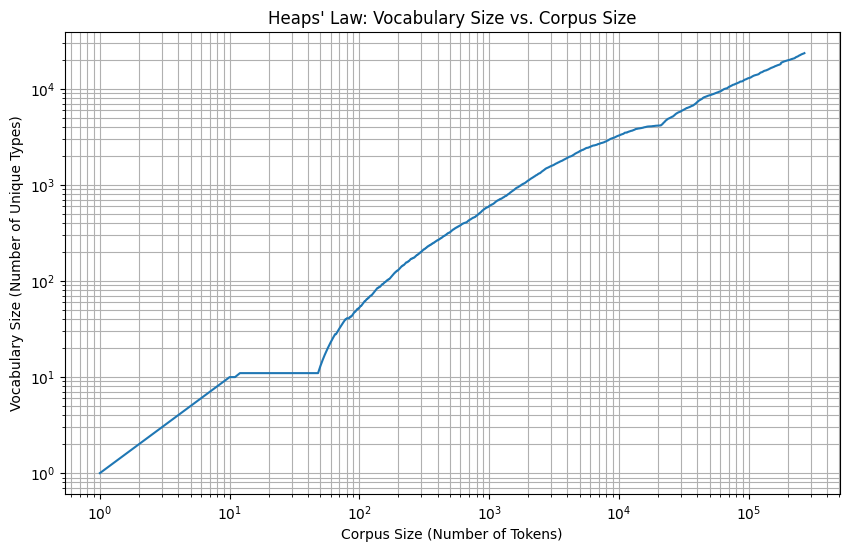


--- Heaps' Law Observations ---
Initial 100 tokens: 53 unique types
Final 268319 tokens: 23663 unique types


In [33]:
# Heaps law demo check
cumulative_tokens = []
cumulative_types = []
seen_types = set()
token_count = 0

for joke_tokens in df['lemmatized_text']:
    for token in joke_tokens:
        token_count += 1
        seen_types.add(token)
        cumulative_tokens.append(token_count)
        cumulative_types.append(len(seen_types))

# Plotting for Heaps' Law
if not cumulative_tokens:
    print("No tokens found. Cannot calculate Heaps' Law.")
else:
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_tokens, cumulative_types)
    plt.title("Heaps' Law: Vocabulary Size vs. Corpus Size")
    plt.xlabel("Corpus Size (Number of Tokens)")
    plt.ylabel("Vocabulary Size (Number of Unique Types)")
    plt.grid(True, which="both", ls="-")
    plt.xscale('log') # Log scale for x-axis to better show the sub-linear growth
    plt.yscale('log') # Log scale for y-axis
    plt.show()

    # You can also try to fit the curve to estimate K and beta, but that's more advanced
    # For now, just observing the curve is sufficient for understanding.

print("\n--- Heaps' Law Observations ---")
print(f"Initial 100 tokens: {cumulative_types[min(99, len(cumulative_types) - 1)]} unique types")
print(f"Final {cumulative_tokens[-1]} tokens: {cumulative_types[-1]} unique types")

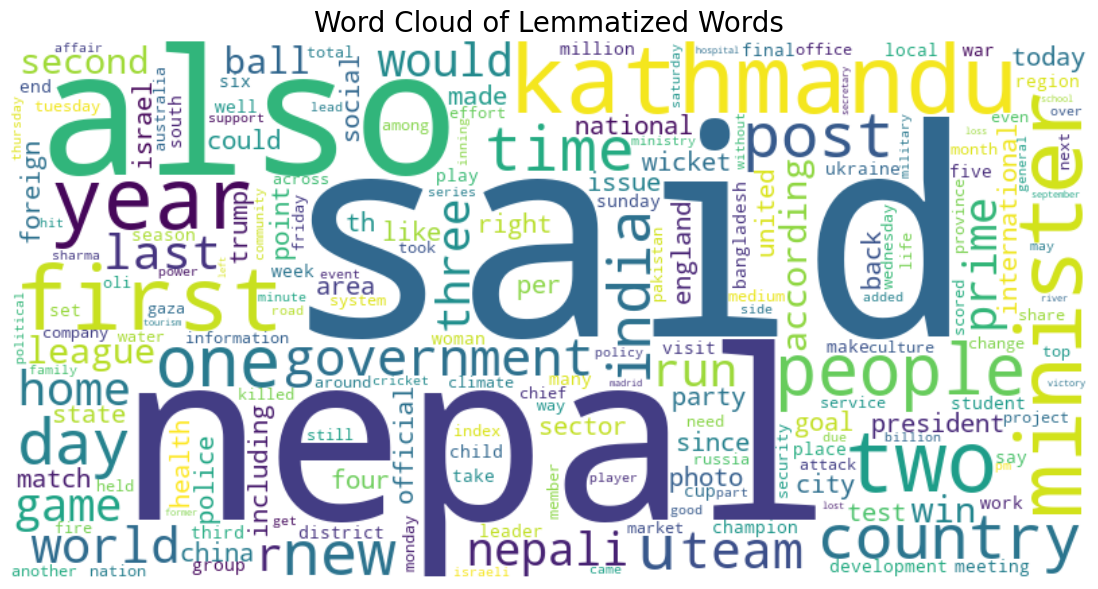

In [34]:
from wordcloud import WordCloud

# Create a word frequency map (word cloud) using matplotlib


# Generate a word cloud from the lemmatized words
word_freq_dict = dict(word_counts)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Lemmatized Words", fontsize=20)
plt.show()